## Analysing dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('amazon_alexa_data.csv')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

## Preprocessing 

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [5]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(0,3150):
    review=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

## Transform the words into vectors using TF-IDF Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(corpus).toarray()
y=data.iloc[:,4].values
y

array([1, 1, 1, ..., 1, 1, 1])

## Split data into training and test data.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
X_train
y_test

array([1, 1, 1, ..., 1, 0, 1])

# Models

## (1)Multinomial Naïve Bayes Classification

In [10]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [11]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
accuracy_NB=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy_NB)


Confusion Matrix:	 
 [[  0  86]
 [  1 963]]
Accuracy:  0.9171428571428571


In [13]:
print('Classification report' ,cr)

Classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.92      1.00      0.96       964

    accuracy                           0.92      1050
   macro avg       0.46      0.50      0.48      1050
weighted avg       0.84      0.92      0.88      1050



## (2) Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
cm=confusion_matrix(y_test,y_pred)
accuracy_LR=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy_LR)


Confusion Matrix:	 
 [[  0  86]
 [  0 964]]
Accuracy:  0.9180952380952381


In [17]:
print('Classification report' ,cr)

Classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.92      1.00      0.96       964

    accuracy                           0.92      1050
   macro avg       0.46      0.50      0.48      1050
weighted avg       0.84      0.92      0.88      1050



## (3) KNN Classification

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [20]:
cm=confusion_matrix(y_test,y_pred)
accuracy_KNN=accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print('Confusion Matrix:\t \n',cm)
print('Accuracy: ', accuracy_KNN)

Confusion Matrix:	 
 [[ 17  69]
 [ 47 917]]
Accuracy:  0.8895238095238095


In [21]:
print('Classification report' ,cr)

Classification report               precision    recall  f1-score   support

           0       0.27      0.20      0.23        86
           1       0.93      0.95      0.94       964

    accuracy                           0.89      1050
   macro avg       0.60      0.57      0.58      1050
weighted avg       0.88      0.89      0.88      1050



# Conclusion

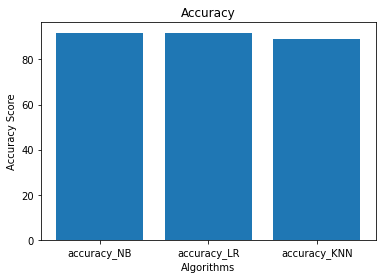

In [22]:
import matplotlib.pyplot as plt
plt.title("Accuracy")
plt.bar(x=['accuracy_NB','accuracy_LR','accuracy_KNN'],height=[accuracy_NB*100,accuracy_LR*100,accuracy_KNN*100])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

In [23]:
print("Accuracy of Multinomial Naïve Bayes Classification :", accuracy_NB*100)
print("Accuracy of Logistic Regression :", accuracy_LR*100)
print("Accuracy of KNN Classification :", accuracy_KNN*100)

Accuracy of Multinomial Naïve Bayes Classification : 91.71428571428571
Accuracy of Logistic Regression : 91.80952380952381
Accuracy of KNN Classification : 88.95238095238095


## Conclusion :  Logistic Regression is the most accurate model, with a 91.8% accuracy rate, followed by Multinomial Naive Bayes Classification (91.7%), and KNN Classification (88.9%).